In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import pandas
import torch
import transformers
from tqdm import notebook
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords as nltk_stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.feature_extraction.text import CountVectorizer 
import string

from nltk import word_tokenize, pos_tag
import re
from itertools import product
import warnings
from joblib import dump, load
from nltk.tokenize import sent_tokenize
from nltk. tokenize import RegexpTokenizer
import gc
from tqdm import tqdm, tqdm_notebook, notebook
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data = pd.read_csv('/datasets/toxic_comments.csv')

In [4]:
data.drop(data.columns[[1]], axis=1, inplace=True)

In [5]:
data.head()

,text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."


In [6]:
#Количество слов
data['word_count'] = data['text'].apply(lambda x: len(str(x).split(" ")))
data[['text','word_count']].head()

,text,word_count
0,Explanation\nWhy the edits made under my usern...,42
1,D'aww! He matches this background colour I'm s...,18
2,"Hey man, I'm really not trying to edit war. It...",42
3,"""\nMore\nI can't make any real suggestions on ...",112
4,"You, sir, are my hero. Any chance you remember...",13


In [7]:
data.describe()

,word_count
count,159571.000000
mean,67.866962
std,100.520204
min,1.000000
25%,17.000000
50%,36.000000
75%,76.000000
max,2273.000000


In [8]:
#Самые распространенные общие слова
freq = pandas.Series(' '. join(data['text']). split ()). value_counts()
freq

the            445987
to             288817
of             219334
and            207381
a              201817
                ...  
football"".         1
Diasystem.          1
siy                 1
Dacians"",          1
joke??              1
Length: 532299, dtype: int64

In [9]:
# Необычные слова
freq1 = pandas.Series(' '.join(data['text']).split()).value_counts()[-20:]
freq1

128.40.97.30     1
Ilaldı           1
Browning,        1
(latin           1
version.The      1
delicately...    1
Drappel,         1
adverb!          1
167,             1
Boeing).         1
""God,""         1
HBP              1
CSCE             1
artilce,         1
Welles'          1
football"".      1
Diasystem.       1
siy              1
Dacians"",       1
joke??           1
dtype: int64

In [10]:
#Стемминг и лемматизация
from nltk.stem.porter import PorterStemmer

lem = WordNetLemmatizer ()
stem = PorterStemmer ()
word = "inversely"
print ("stemming:", stem. stem (word))
print("lemmatization:", lem. lemmatize (word, "v"))

stemming: invers
lemmatization: inversely


In [11]:
#удаляем стоп-слова
stop_words = set(nltk_stopwords.words('english'))

#создаем список пользовательских стоп-слов
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [12]:
def tokenizer(text):
    tokens = [ word for sent in sent_tokenize(text) for word in word_tokenize(sent)]
    tokens = list(filter(lambda t: t not in punctuation, tokens)) 
    tokens = list(filter(lambda t: t.lower() not in stop_words, tokens))
    filtered_tokens = []
    for token in tokens: # Регулярные выражений
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_tokens = list(
        map(lambda token: wordnet_lemmatizer.lemmatize(token.lower()), filtered_tokens))
    filtered_tokens = list(filter(lambda t: t not in punctuation, filtered_tokens))
    return ' '.join(filtered_tokens)

In [13]:
corpus = []
for i in range(0, 3847):
    #Уудаляем знаки препинания
    text = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    
    #конвертируем в строчные
    text = text.lower()
    
    #удаляем теги
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    #удаляем специальные символы и цифры
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #конвертируем в список из строк
    text = text.split()

    #вытекющие
    ps=PorterStemmer()
    
    #лемматизация
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [14]:
#рассмотрим элемент из корпуса
corpus[222]

'wrong although blocked occasion never blocked sockpuppetry vandalism dispute multiple topic various sock user hkelkar user vandalpetrol permabanned never used account permitted edit get account deleted say indeffed blast'

In [15]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

UsageError: Line magic function `%` not found.


In [17]:
#создаем вектора из количества слов 
cv=CountVectorizer(max_df=0.8, stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv. fit_transform(corpus)

In [18]:
list(cv. vocabulary_. keys ()) [: 10]

['explanation',
 'edits',
 'made',
 'username',
 'hardcore',
 'fan',
 'reverted',
 'vandalism',
 'gas',
 'voted']

[Text(0, 0, 'article'),
 Text(0, 0, 'page'),
 Text(0, 0, 'wikipedia'),
 Text(0, 0, 'talk'),
 Text(0, 0, 'like'),
 Text(0, 0, 'would'),
 Text(0, 0, 'please'),
 Text(0, 0, 'see'),
 Text(0, 0, 'source'),
 Text(0, 0, 'user'),
 Text(0, 0, 'think'),
 Text(0, 0, 'know'),
 Text(0, 0, 'time'),
 Text(0, 0, 'people'),
 Text(0, 0, 'edit'),
 Text(0, 0, 'image'),
 Text(0, 0, 'make'),
 Text(0, 0, 'use'),
 Text(0, 0, 'may'),
 Text(0, 0, 'say')]

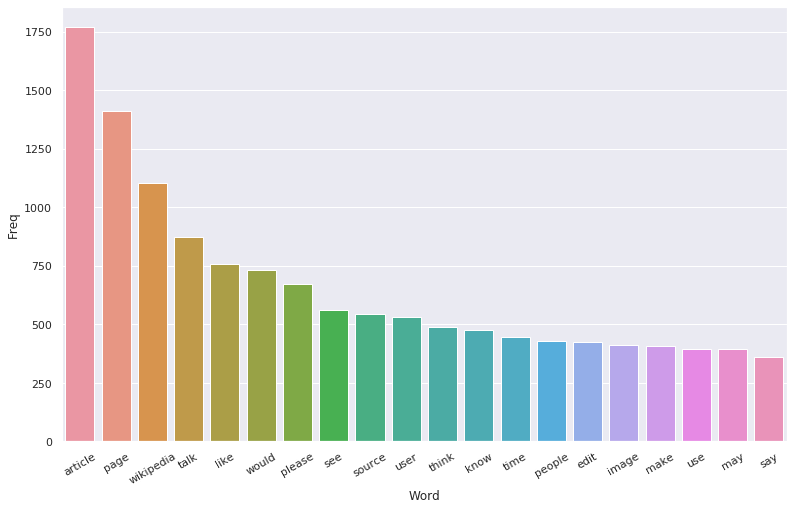

In [19]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

               Bi-gram  Freq
0            talk page   349
1         fuck useless   217
2          useless bot   217
3             bot fuck   217
4      speedy deletion   115
5            homo like    88
6             fair use    87
7           would like    87
8            like mitt    87
9          mitt romney    87
10         romney user    86
11     reliable source    85
12     personal attack    80
13      mothjer fucker    78
14   fucker cocksucker    78
15  cocksucker mothjer    77
16           feel free    60
17        article talk    55
18        town village    54
19            http www    53


[Text(0, 0, 'talk page'),
 Text(0, 0, 'fuck useless'),
 Text(0, 0, 'useless bot'),
 Text(0, 0, 'bot fuck'),
 Text(0, 0, 'speedy deletion'),
 Text(0, 0, 'homo like'),
 Text(0, 0, 'fair use'),
 Text(0, 0, 'would like'),
 Text(0, 0, 'like mitt'),
 Text(0, 0, 'mitt romney'),
 Text(0, 0, 'romney user'),
 Text(0, 0, 'reliable source'),
 Text(0, 0, 'personal attack'),
 Text(0, 0, 'mothjer fucker'),
 Text(0, 0, 'fucker cocksucker'),
 Text(0, 0, 'cocksucker mothjer'),
 Text(0, 0, 'feel free'),
 Text(0, 0, 'article talk'),
 Text(0, 0, 'town village'),
 Text(0, 0, 'http www')]

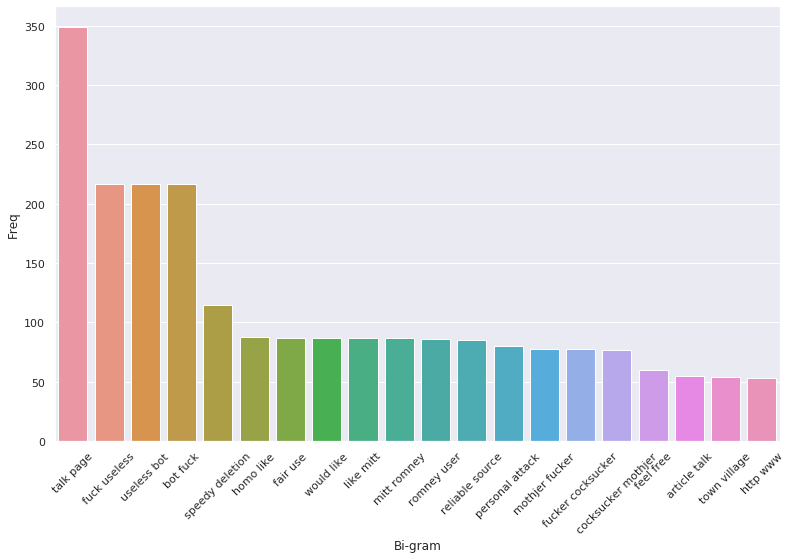

In [20]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                     Tri-gram  Freq
0            fuck useless bot   217
1            useless bot fuck   217
2            bot fuck useless   216
3              homo like mitt    87
4            like mitt romney    87
5            mitt romney user    86
6   mothjer fucker cocksucker    78
7   fucker cocksucker mothjer    77
8   cocksucker mothjer fucker    77
9           city town village    53
10            user nhrhs homo    44
11            nhrhs homo like    44
12          article talk page    43
13          romney user nhrhs    43
14      romney user enigmaman    43
15        user enigmaman homo    43
16        enigmaman homo like    43
17  criterion speedy deletion    36
18          http en wikipedia    36
19           en wikipedia org    36


[Text(0, 0, 'fuck useless bot'),
 Text(0, 0, 'useless bot fuck'),
 Text(0, 0, 'bot fuck useless'),
 Text(0, 0, 'homo like mitt'),
 Text(0, 0, 'like mitt romney'),
 Text(0, 0, 'mitt romney user'),
 Text(0, 0, 'mothjer fucker cocksucker'),
 Text(0, 0, 'fucker cocksucker mothjer'),
 Text(0, 0, 'cocksucker mothjer fucker'),
 Text(0, 0, 'city town village'),
 Text(0, 0, 'user nhrhs homo'),
 Text(0, 0, 'nhrhs homo like'),
 Text(0, 0, 'article talk page'),
 Text(0, 0, 'romney user nhrhs'),
 Text(0, 0, 'romney user enigmaman'),
 Text(0, 0, 'user enigmaman homo'),
 Text(0, 0, 'enigmaman homo like'),
 Text(0, 0, 'criterion speedy deletion'),
 Text(0, 0, 'http en wikipedia'),
 Text(0, 0, 'en wikipedia org')]

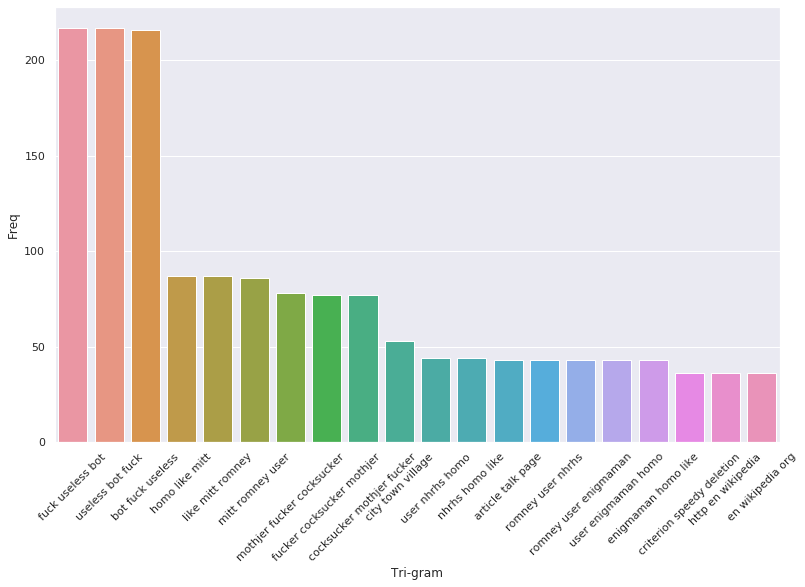

In [21]:
#Слова, которые чаще всего встречаются
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

Преобразование в матрицу целых чисел:
    
Следующий шаг - уточнение количества слов с использованием ВЕКТОРИЗАТОРА TF-IDF. Недостаток простого подсчета слов, полученного от счетчика, заключается в том, что большое количество определенных общих слов может ослабить влияние более контекстуальных конкретных слов в корпусе. Это преодолевается ВЕКТОРИЗАТОРОМ TF-IDF, который наказывает слова, которые появляются несколько раз в документе. TF-IDF-это оценки частоты слов, которые выделяют слова, которые более важны для контекста, а не те, которые часто появляются в документах.

TF-IDF состоит из 2 компонентов:
- TF — терм частота
- IDF-обратная частота документов

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))


Ключевые слова 

In [23]:
#Функция сортировки в порядке убывания
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
sitush anyone assume good faith writing much yadavs page evident discussion conveniently selecting source negative conveniently rejecting source positive person spamming article vandalizing yes contribute article wiki let first correct thing yadav much wrong going got ikonoblast banned got banned get anyone banned differs biased stand yadavs going give follow wp policy ensure get thing corrected yadav dont let fowler personal view dominate page peace

Keywords:
banned 0.334
yadav 0.32
conveniently 0.32
got 0.183
anyone 0.174
